# Marketing Campaign Performance

## Descriptive Analysis

## Variables:

* **Campaign_ID:** Type Numeric or alphanumeric unique identifier for each campaign.
* **Company:** Name of the company responsible for the campaign.
* **Campaign_Type:** Type of campaign (e.g., display, social media, email).
* **Target_Audience:** Description of the campaign's intended audience.
* **Duration:** Duration of the campaign in days or weeks.
* **Channel_Used:** Marketing channels used in the campaign (e.g., influencer, social media, email).
* **Conversion_Rate:** The ratio of conversions (e.g., sales) to the number of individuals reached.
* **Acquisition_Cost:** Total cost of acquiring leads or conversions through the campaign.
* **ROI (Return on Investment):** Return on Investment, representing the profitability and success of the campaign.
* **Location:** Geographic locations where the campaign is implemented.
* **Language:** The language in which the campaign or content is presented.
* **Clicks:** The number of times users clicked on the campaign content or advertisement.
* **Impressions:** The total number of times the campaign content was displayed to users.
* **Engagement_Score:** A score that quantifies the level of engagement with the campaign (likes, shares, comments, etc.).
* **Customer_Segment:** The specific segment of customers or audience that the campaign is targeting.
* **Date:** The date on which the campaign or interaction took place.

## Packages

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data Set

In [3]:
df=pd.read_csv('marketing_campaign_dataset.csv', sep=',')
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


## Data Estructure

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Campaign_ID       200000 non-null  category
 1   Company           200000 non-null  category
 2   Campaign_Type     200000 non-null  category
 3   Target_Audience   200000 non-null  category
 4   Duration          200000 non-null  category
 5   Channel_Used      200000 non-null  category
 6   Conversion_Rate   200000 non-null  float64 
 7   Acquisition_Cost  200000 non-null  float64 
 8   ROI               200000 non-null  float64 
 9   Location          200000 non-null  category
 10  Language          200000 non-null  category
 11  Clicks            200000 non-null  int64   
 12  Impressions       200000 non-null  int64   
 13  Engagement_Score  200000 non-null  int64   
 14  Customer_Segment  200000 non-null  category
 15  Date              200000 non-null  object  
dtypes:

In [7]:
categorical_variables = ['Campaign_ID','Company', 'Campaign_Type', 'Target_Audience', 'Duration','Channel_Used','Location','Language','Customer_Segment']

for var in categorical_variables:
    df[var] = df[var].astype('category')

## Missing values

In [4]:
df.isna()
print(df.isna().sum())

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64


## Exploratory Data Analysis

The database contains 200000 records about marketing campaigns. The conversion rate has an average value of 0.08 and a maximum value of 0.15. The Acquisition_Cost presents an average of 12504.39 with a minimum of 5000 and a maximum of 20000. On average it has an ROI of 5 and a maximum of 8. The minimum number of clicks in a campaign is 100 and a maximum of 1000, while 1000 is the minimum number of times the campaign was displayed or viewed by the target audience, with a maximum of 10000. The average level of engagement generated by the campaign is 5.5.




In [13]:
# Summary statistics
df.describe()

,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.080070,12504.393040,5.002438,549.772030,5507.301520,5.494710
std,0.040602,4337.664545,1.734488,260.019056,2596.864286,2.872581
min,0.010000,5000.000000,2.000000,100.000000,1000.000000,1.000000
25%,0.050000,8739.750000,3.500000,325.000000,3266.000000,3.000000
50%,0.080000,12496.500000,5.010000,550.000000,5517.500000,5.000000
75%,0.120000,16264.000000,6.510000,775.000000,7753.000000,8.000000
max,0.150000,20000.000000,8.000000,1000.000000,10000.000000,10.000000


### Types of campaigns by company

The following chart shows the types of campaigns carried out by each of the companies. TechCorp tops the list with the highest number of campaigns, reaching a total of 40237, followed by Alpha Innovations and DataTech Solutions. For the most part, TechCorp carries out Influencer-type campaigns, while social media campaigns are less frequent. However, a similar pattern is observed in the number of campaigns among the different companies, suggesting that all five companies are executing a similar number of campaigns across different types.

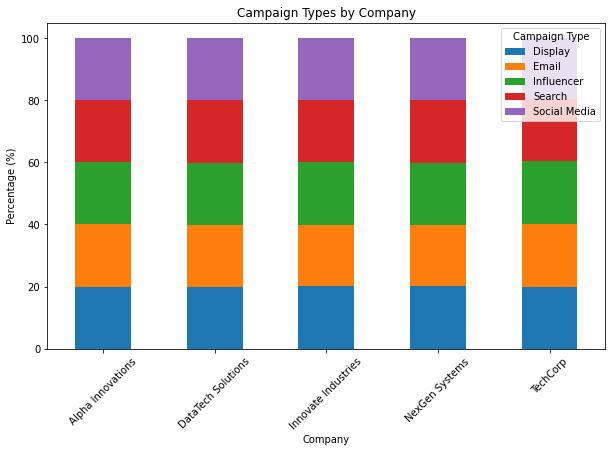

In [28]:
pivot_table = df.pivot_table(index='Company', columns='Campaign_Type', values='Campaign_ID', aggfunc='count')
normalized_pivot = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

normalized_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Company')
plt.ylabel('Percentage (%)')
plt.title('Campaign Types by Company')
plt.xticks(rotation=45)
plt.legend(title='Campaign Type')
plt.show()

### Campaign by Target_Audience

It can be observed that Influencer and Search campaigns are the most common in terms of frequency. In particular, Influencer type campaigns aim to attract an audience of various ages. Despite this, a similar trend in target audience is observed for the different campaign categories. This suggests that, although campaign types may vary, there is some consistency in the target audience approach, which could indicate an overall marketing strategy focused on a broad and diverse audience.

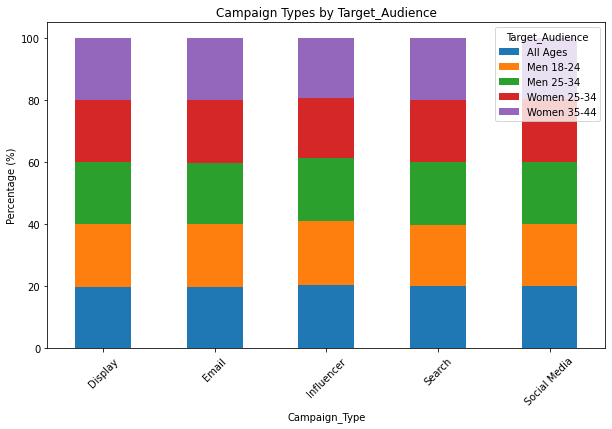

In [32]:
pivot_table11 = df.pivot_table(index='Campaign_Type', columns='Target_Audience', values='Campaign_ID', aggfunc='count')
normalized_pivot = pivot_table11.div(pivot_table11.sum(axis=1), axis=0) * 100

normalized_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Campaign_Type')
plt.ylabel('Percentage (%)')
plt.title('Campaign Types by Target_Audience')
plt.xticks(rotation=45)
plt.legend(title='Target_Audience')
plt.show()

In [23]:
df.groupby(['Campaign_Type','Target_Audience'])['Campaign_Type'].count()

Campaign_Type  Target_Audience
Display        All Ages           7926
               Men 18-24          8119
               Men 25-34          7927
               Women 25-34        8040
               Women 35-44        7975
Email          All Ages           7897
               Men 18-24          8012
               Men 25-34          7930
               Women 25-34        8018
               Women 35-44        8013
Influencer     All Ages           8232
               Men 18-24          8195
               Men 25-34          8135
               Women 25-34        7809
               Women 35-44        7798
Search         All Ages           8032
               Men 18-24          7965
               Men 25-34          8076
               Women 25-34        8098
               Women 35-44        7986
Social Media   All Ages           7932
               Men 18-24          7967
               Men 25-34          7955
               Women 25-34        8048
               Women 35-44       

### ROI by Campaign Type

When analyzing the Return on Investment (ROI), which reflects the profitability and success of the campaign, a uniform distribution is observed for each campaign. In this distribution, the average is around 5, with a minimum value of 2 and a maximum value of 8. An interesting insight here is that, despite the differences between the individual campaigns, there is some consistency in the ROI measure, suggesting effective management of resources and a balanced approach to overall profitability.

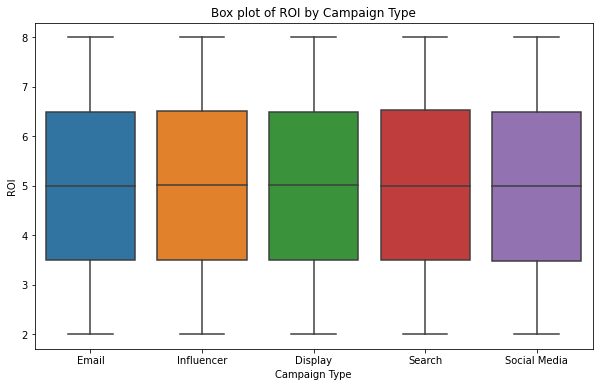

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Campaign_Type', y='ROI')
plt.title('Box plot of ROI by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('ROI')
plt.show()

In [46]:
df.groupby('Campaign_Type')['Acquisition_Cost'].mean()

Campaign_Type
Display         12508.034461
Email           12495.346100
Influencer      12507.170330
Search          12498.736459
Social Media    12512.698094
Name: Acquisition_Cost, dtype: float64

### Distribution of Channel Usage

The channels used to promote campaigns are generally used in almost equal amounts. Google Ads, YouTube and Instagram each account for a 16.7% share, while Email has a 16.8% share. This suggests that campaigns are fairly evenly distributed across multiple channels. An interesting insight here is that the company appears to be taking a balanced and diversified approach to reaching its audience, making use of multiple platforms with comparable emphasis.

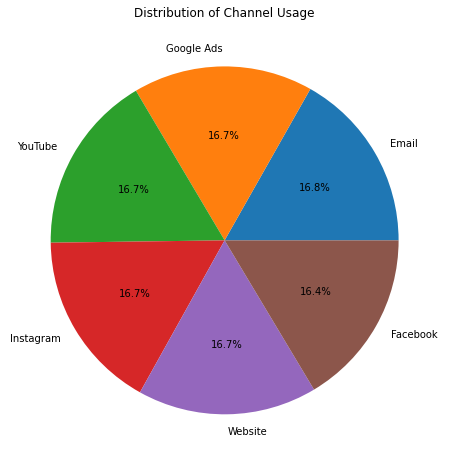

In [6]:
channel_counts = df['Channel_Used'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Channel Usage')
plt.show()

### Duration Distribution by Campaign Type

In relation to the duration of the campaigns, there is a diversity of time periods: 15, 30, 45 and 60 days. Most of the campaigns are executed with a duration of 30 days. Each campaign has a homogeneous distribution in terms of duration. This pattern suggests that both short and longer campaigns are carried out. A relevant insight here is that the company seems to adopt a flexible strategy in terms of campaign duration, allowing it to adapt to different marketing objectives and approaches, either for one-off campaigns or for long-term strategies.

<Figure size 720x432 with 0 Axes>

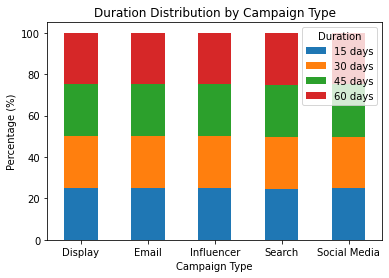

In [51]:
pivot_table2 = df.pivot_table(index='Campaign_Type', columns='Duration', values='Campaign_ID', aggfunc='count')
normalized_pivot = pivot_table2.div(pivot_table2.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
normalized_pivot.plot(kind='bar', stacked=True)
plt.xlabel('Campaign Type')
plt.ylabel('Percentage (%)')
plt.title('Duration Distribution by Campaign Type')
plt.xticks(rotation=0)
plt.legend(title='Duration')
plt.show()

In [37]:
df.groupby('Duration')['Duration'].count()

Duration
15 days    49779
30 days    50255
45 days    50100
60 days    49866
Name: Duration, dtype: int64

### Location

Miami has the most extensive campaigns, followed by New York. In terms of the cost the company incurs to acquire customers, the average in Miami is 12515.16, while Los Angeles has a slightly higher value of 12532.53.

In [38]:
df['Location'].value_counts()

Miami          40269
New York       40024
Chicago        40010
Los Angeles    39947
Houston        39750
Name: Location, dtype: int64

In [41]:
df.groupby('Location')['Acquisition_Cost'].mean()

Location
Chicago        12515.161585
Houston        12454.387245
Los Angeles    12532.539765
Miami          12515.208001
New York       12504.317984
Name: Acquisition_Cost, dtype: float64

### Language

It is clear that most of the campaigns are conducted in Mandarin, followed by those in Spanish.

In [45]:
df['Language'].value_counts()

Mandarin    40255
Spanish     40102
German      39983
English     39896
French      39764
Name: Language, dtype: int64

### Campaign type by total clicks and impressions

When analyzing the type of campaign according to the number of times users clicked on the campaign content or ad, it becomes evident that Influencer type campaigns receive the most clicks, followed by Display type campaigns. Also when examining the impressions, it stands out that the type of campaign that registers the highest number of times the campaign content was shown to users is search.

In [47]:
df.groupby('Campaign_Type')['Clicks'].sum()

Campaign_Type
Display         220074756
Email           220144927
Influencer      220769081
Search          221415139
Social Media    219056401
Name: Impressions, dtype: int64

In [48]:
df.groupby('Campaign_Type')['Impressions'].sum()

Campaign_Type
Display         220074756
Email           220144927
Influencer      220769081
Search          221415139
Social Media    219056401
Name: Impressions, dtype: int64

## Conclusions

Analyzing the information provided, several significant insights emerge. The even distribution in Return on Investment (ROI) suggests efficient resource management and an equitable strategy to achieve consistent benefits across different types of campaigns. The balanced use of multiple promotional channels highlights a broad and diversified approach to reaching the audience, which could be contributing to the overall success of the campaigns by maximizing their reach. The variety in the duration of the campaigns reflects a flexible strategy that adapts to both short-term objectives and long-term strategies, evidencing adaptability and agility.

The concentrated campaigns in Miami and New York indicate a strategic geographic focus on high-impact areas, while the difference in acquisition costs between Miami and Los Angeles may reveal insights into market dynamics or specific regional strategies. In addition, the preference for Mandarin and Spanish-language campaigns reflects an effort to reach specific audiences based on their language and cultural preferences.

These observations indicate that the company adopts a balanced and adaptive strategy in its marketing efforts, focusing on maximizing impact, personalizing communication and maintaining an effective presence across different channels and campaign durations.